# Initializing

In [18]:
import os

INPUT_DIR = os.path.join('.','input')
TRAIN_DIR=os.path.join(INPUT_DIR,'train')
VALID_DIR=os.path.join(INPUT_DIR,'valid')
VALID_DIR

'.\\input\\valid'

In [1]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

ds_train = image_dataset_from_directory(
    'input/train',
    labels = 'inferred',
    label_mode = 'binary',
    image_size = [128, 128],
    interpolation = 'nearest',
    batch_size = 64,
    shuffle = True,
).cache()

ds_valid = image_dataset_from_directory(
    'input/valid',
    labels = 'inferred',
    label_mode = 'binary',
    image_size = [128, 128],
    interpolation = 'nearest',
    batch_size = 64,
    shuffle = False,
).cache()

def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers.experimental import preprocessing

model = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomContrast(0.5),
    preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

In [3]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=25,
)

Epoch 1/25
80/80 [==============================] - 40s 226ms/step - loss: 0.6656 - binary_accuracy: 0.5753 - val_loss: 0.6371 - val_binary_accuracy: 0.5785
Epoch 2/25
80/80 [==============================] - 12s 153ms/step - loss: 0.6447 - binary_accuracy: 0.6218 - val_loss: 0.6157 - val_binary_accuracy: 0.6569
Epoch 3/25
80/80 [==============================] - 12s 152ms/step - loss: 0.6059 - binary_accuracy: 0.6762 - val_loss: 0.5778 - val_binary_accuracy: 0.7119
Epoch 4/25
80/80 [==============================] - 12s 153ms/step - loss: 0.5931 - binary_accuracy: 0.6922 - val_loss: 0.5693 - val_binary_accuracy: 0.7044
Epoch 5/25
80/80 [==============================] - 12s 153ms/step - loss: 0.5581 - binary_accuracy: 0.7274 - val_loss: 0.5265 - val_binary_accuracy: 0.7662
Epoch 6/25
80/80 [==============================] - 12s 154ms/step - loss: 0.5276 - binary_accuracy: 0.7639 - val_loss: 0.5110 - val_binary_accuracy: 0.7808
Epoch 7/25
80/80 [==============================] - 12s 15

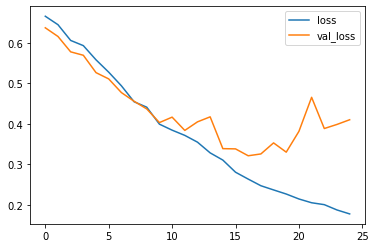

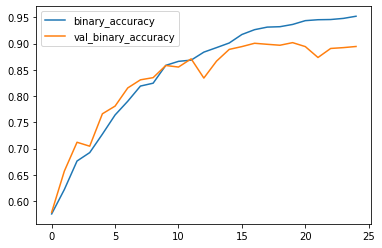

In [5]:
from IPython.core.display_functions import display
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame[['loss','val_loss']].plot()
history_frame[['binary_accuracy','val_binary_accuracy']].plot();